In [78]:
# Importing relevant packages and dataset 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\CalumBrown\OneDrive - Blend 360\Documents\Personal Development\Machine Learning Interview\Machine Failure Dataset.csv")


In [79]:
# Dataset with 10,000 rows
# 100 null values in rotational speed column which will need to be fixed
# Timestamp is a string variable which may need changed 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UID                      10000 non-null  object 
 1   Machine Type             10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   9900 non-null   float64
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
 9   Timestamp                10000 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


In [80]:
# Air temperature quite a drop from 25% quartile value to minimum, wil explore this further later
# Target appears to be a binary variable 
# High variation and standard deviation in rotational speeed column 
df.describe()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,9900.000000,10000.000000,10000.000000,10000.000000
mean,299.204930,310.005560,1539.122424,43.976910,107.951000,0.033900
std,4.085128,1.483734,179.626705,20.473392,63.654147,0.180981
min,253.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.100000,308.800000,1423.000000,33.600000,53.000000,0.000000
50%,299.900000,310.100000,1503.000000,40.700000,108.000000,0.000000
75%,301.400000,311.100000,1612.000000,47.900000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,214.400000,253.000000,1.000000


In [81]:
df.nunique()

UID                        10000
Machine Type                   4
Air temperature [K]          185
Process temperature [K]       82
Rotational speed [rpm]       940
Torque [Nm]                  849
Tool wear [min]              246
Target                         2
Failure Type                   7
Timestamp                  10000
dtype: int64

In [82]:
# Going column by column checking for mistakes and devloping under
# UID column 
# 10,000 unique values sugesting its some sort of identifier for each machine reading 
# Checking to see if any correlation between machine type and UID values 
# X!,x_1,x1 all start with a designted later - X2 appears random

uidtest = df.filter(items = ['UID', 'Machine Type'])

uidtest['UID Start'] = uidtest['UID'].str[0]

uidtest.filter(items = ['UID Start', 'Machine Type']).drop_duplicates() \
.sort_values(by = ['UID Start'], ascending = True)


,UID Start,Machine Type
10,H,X1
181,H,X2
1,L,x_1
91,L,X2
0,M,x1
5,M,X2


In [83]:
# only 100 observations of X2 - seems bizarre and needs explored further. Possible input error
uidtest.filter(items = ['UID Start', 'Machine Type', 'UID']) \
.groupby(['UID Start', 'Machine Type']).count()

UID
UID Start Machine Type      
H         X1             989
          X2              14
L         X2              63
          x_1           5937
M         X2              23
          x1            2974

In [84]:
## X2 observations are all from 2011 through to 2013 but i beleive rest of data was from 2001 - 2003 - again possible input errors

## Try to see if other machine types are missing observations for these times
pd.set_option('display.max_rows', 200)
df.loc[df['Machine Type'] == 'X2']


,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp
5,M14865,X2,298.1,308.6,1425.0,41.9,11,0,No Failure,01/12/2011 05:00
89,M14949,X2,298.9,308.9,1487.0,39.5,30,0,No Failure,04/12/2011 17:00
91,L47271,X2,298.9,308.9,1830.0,24.9,35,0,No Failure,04/12/2011 19:00
132,M14992,X2,282.7,308.4,1441.0,43.2,132,0,No Failure,06/12/2011 12:00
163,M15023,X2,298.4,308.2,1468.0,43.8,2,0,No Failure,07/12/2011 19:00
181,H29595,X2,298.2,308.3,1824.0,24.2,49,0,No Failure,08/12/2011 13:00
279,L47459,X2,298.0,308.1,1819.0,23.4,78,0,No Failure,12/12/2011 15:00
419,M15279,X2,297.3,308.3,1501.0,38.2,2,0,No Failure,18/12/2011 11:00
618,H30032,X2,298.2,310.0,1433.0,44.2,68,0,No Failure,26/12/2011 18:00
644,H30058,X2,297.7,309.4,1608.0,30.2,135,0,No Failure,27/12/2011 20:00


In [85]:

# Seperating Date and timestamp 
# Will split at delimeter ' '
# Leaving original column in for now

df[['Date', 'Time']] = df['Timestamp'].str.split(' ', expand = True)

## Changing data types

df['Date'] = df['Date'].astype(dtype = 'datetime64[ns]')
df['Time'] = df['Time'].astype(dtype = 'datetime64[ns]')

In [86]:
# Now checking to see if days are missing 
# Dates for all other machine types are spread from 2001 - 2003, further evidence that X2 is either an input error or sperate machine tpye
# Due to having no consistent data for the X2 i am veering on side of believing it is error

df.loc[df['Machine Type'] != 'X2'].describe()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Date,Time
count,9900.000000,9900.000000,9803.000000,9900.000000,9900.000000,9900.000000,9900,9900
mean,299.206313,310.007717,1539.107722,43.988465,108.018081,0.034040,2002-06-26 19:02:23.999999872,2026-01-04 11:29:41.454545664
min,253.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,2001-01-12 00:00:00,2026-01-04 00:00:00
25%,298.100000,308.800000,1423.000000,33.600000,53.000000,0.000000,2002-03-15 00:00:00,2026-01-04 05:45:00
50%,299.900000,310.100000,1504.000000,40.700000,108.000000,0.000000,2002-06-27 00:00:00,2026-01-04 11:00:00
75%,301.400000,311.100000,1612.000000,47.900000,162.000000,0.000000,2002-10-09 00:00:00,2026-01-04 17:00:00
max,304.500000,313.800000,2886.000000,214.400000,253.000000,1.000000,2003-12-01 00:00:00,2026-01-04 23:00:00
std,4.082810,1.483273,179.539017,20.489869,63.611375,0.181342,NaN,NaN


In [87]:
# Spot checking some of the X2 observations to see if these readings are missing from 2001-2003
# all dates of X2 are missing in 2001 - 2003.
# Why dont we have readings every hour for every machine? 
df.loc[df['Date'] == '2001-01-12']



,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp,Date,Time
0,M14860,x1,298.1,308.6,1551.0,42.8,0,0,No Failure,01/12/2001 00:00,2001-01-12,2026-01-04 00:00:00
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,0,No Failure,01/12/2001 01:00,2001-01-12,2026-01-04 01:00:00
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,0,No Failure,01/12/2001 02:00,2001-01-12,2026-01-04 02:00:00
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,0,No Failure,01/12/2001 03:00,2001-01-12,2026-01-04 03:00:00
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,0,No Failure,01/12/2001 04:00,2001-01-12,2026-01-04 04:00:00
6,L47186,x_1,298.1,308.6,1558.0,42.4,14,0,No Failure,01/12/2001 06:00,2001-01-12,2026-01-04 06:00:00
7,L47187,x_1,298.1,308.6,1527.0,40.2,16,0,No Failure,01/12/2001 07:00,2001-01-12,2026-01-04 07:00:00
8,M14868,x1,298.3,308.7,1667.0,28.6,18,0,No Failure,01/12/2001 08:00,2001-01-12,2026-01-04 08:00:00
9,M14869,x1,298.5,309.0,1741.0,107.8,21,0,No Failure,01/12/2001 09:00,2001-01-12,2026-01-04 09:00:00
10,H29424,X1,298.4,308.9,1782.0,23.9,24,0,No Failure,01/12/2001 10:00,2001-01-12,2026-01-04 10:00:00


In [88]:
# Converting date to string so can replace values

df['Date'] = df['Date'].astype(dtype='str')


In [89]:
df['Date'] = df['Date'].str.replace('2011', '2001')
df['Date'] = df['Date'].str.replace('2012', '2002')
df['Date'] = df['Date'].str.replace('2013', '2003')

df['Timestamp'] = df['Timestamp'].str.replace('2011', '2001')
df['Timestamp'] = df['Timestamp'].str.replace('2012', '2002')
df['Timestamp'] = df['Timestamp'].str.replace('2013', '2003')

In [90]:
# Converting X2 to correct Machine types based on UID indicator 

df.loc[df['UID'].str.startswith('H'), ['Machine Type']] = 'X1'
df.loc[df['UID'].str.startswith('M'), ['Machine Type']] = 'x1'
df.loc[df['UID'].str.startswith('L'), ['Machine Type']] = 'x_1'

In [91]:
# Checking failure Type column 
# dropping 'error' as no real understanding of it  - error in reading, error in machine? no clue
# Dropping 100 rows

df['Failure Type'].value_counts().sort_index()


df = df.loc[df['Failure Type'] != 'Error']

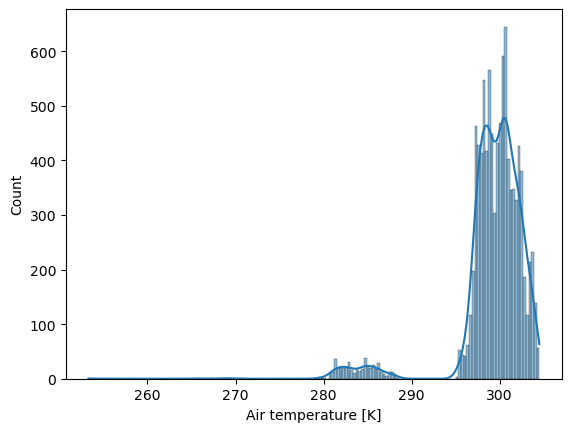

In [92]:
# Checking air temperature column 
# Can see a grouping of lower temperatures at around 280 - 290 kelvin, most frequent grouping around 295 - 305
# Then some extremely low temperatures which look like outliers

sns.histplot(x=df['Air temperature [K]'], kde = True)
plt.show()



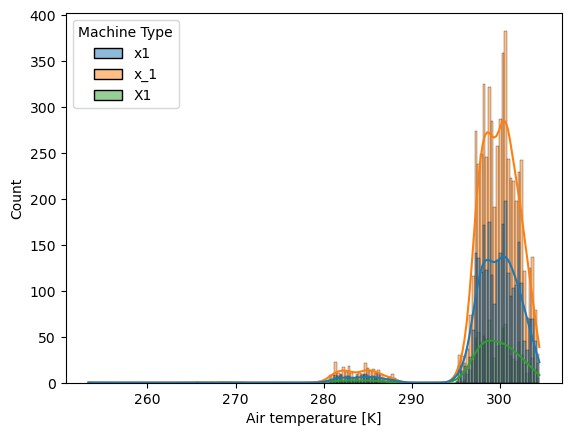

In [93]:
# All machine types following much the same trends
sns.histplot(x=df['Air temperature [K]'], hue = df['Machine Type'], kde = True)
plt.show()



<Axes: xlabel='Timestamp', ylabel='Air temperature [K]'>

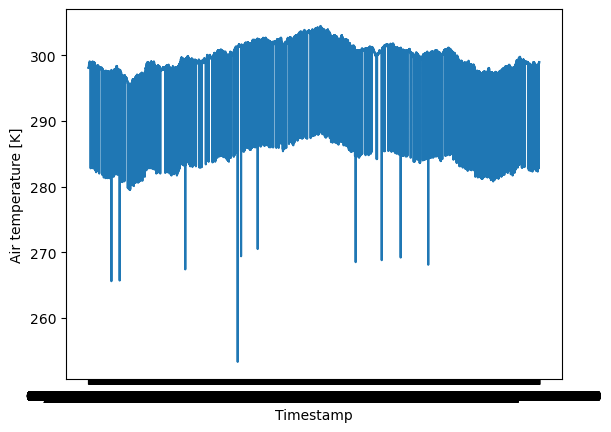

In [94]:
# Everything below 280 kevlin looks to be probably an outlier or error

sns.lineplot(x = df['Timestamp'], y = df['Air temperature [K]'])



In [95]:
# Checking that wont be removing any failure observations 
df.loc[df['Air temperature [K]'] < 280]

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp,Date,Time
509,M15369,x1,265.6,309.3,1415.0,41.3,17,0,No Failure,22/12/2001 05:00,2001-12-22,2026-01-04 05:00:00
693,L47873,x_1,265.7,309.1,1477.0,38.3,60,0,No Failure,29/12/2001 21:00,2001-12-29,2026-01-04 21:00:00
871,L48051,x_1,279.8,306.4,1339.0,53.2,67,0,No Failure,06/01/2002 07:00,2002-06-01,2026-01-04 07:00:00
887,H30301,X1,279.7,306.2,2161.0,16.5,105,0,No Failure,06/01/2002 23:00,2002-06-01,2026-01-04 23:00:00
913,L48093,x_1,279.5,306.0,1621.0,29.5,176,0,No Failure,08/01/2002 01:00,2002-08-01,2026-01-04 01:00:00
921,H30335,X1,279.5,305.9,1593.0,37.2,197,0,No Failure,08/01/2002 09:00,2002-08-01,2026-01-04 09:00:00
927,H30341,X1,279.6,306.0,1396.0,52.4,0,0,No Failure,08/01/2002 15:00,2002-08-01,2026-01-04 15:00:00
2148,L49328,x_1,267.4,308.9,1583.0,34.1,176,0,No Failure,28/02/2002 12:00,2002-02-28,2026-01-04 12:00:00
3305,M18165,x1,253.3,310.4,1577.0,48.3,78,0,No Failure,17/04/2002 17:00,2002-04-17,2026-01-04 17:00:00
3380,L50560,x_1,269.4,310.7,1590.0,36.3,43,0,No Failure,20/04/2002 20:00,2002-04-20,2026-01-04 20:00:00


In [96]:
df.loc[df['Date'] == '2001-12-22']

# Can see that air temperature suddenly drops to 265 at 5 am from 297 at 4 am? Doesnt appear to make sense and i definetly believe these are reading errors
# Option is to fill with average or remove
# I think filling with average for that day is a good option as there is very little variation in air temperature across the days - makes sense if in a warehouse environment

df.loc[df['Date'] == '2001-12-22']



,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp,Date,Time
504,M15364,x1,297.6,309.3,1529.0,41.9,3,0,No Failure,22/12/2001 00:00,2001-12-22,2026-01-04 00:00:00
505,L47685,x_1,297.6,309.3,1610.0,35.0,6,0,No Failure,22/12/2001 01:00,2001-12-22,2026-01-04 01:00:00
506,L47686,x_1,297.6,309.3,1543.0,34.3,8,0,No Failure,22/12/2001 02:00,2001-12-22,2026-01-04 02:00:00
507,H29921,X1,297.8,309.4,1445.0,48.2,10,0,No Failure,22/12/2001 03:00,2001-12-22,2026-01-04 03:00:00
508,L47688,x_1,297.7,309.3,1893.0,24.6,15,0,No Failure,22/12/2001 04:00,2001-12-22,2026-01-04 04:00:00
509,M15369,x1,265.6,309.3,1415.0,41.3,17,0,No Failure,22/12/2001 05:00,2001-12-22,2026-01-04 05:00:00
510,L47690,x_1,297.5,309.3,1564.0,37.5,20,0,No Failure,22/12/2001 06:00,2001-12-22,2026-01-04 06:00:00
511,L47691,x_1,297.5,309.3,1479.0,39.4,22,0,No Failure,22/12/2001 07:00,2001-12-22,2026-01-04 07:00:00
512,L47692,x_1,297.5,309.2,1426.0,44.8,24,0,No Failure,22/12/2001 08:00,2001-12-22,2026-01-04 08:00:00
513,L47693,x_1,297.4,309.2,1428.0,38.8,26,0,No Failure,22/12/2001 09:00,2001-12-22,2026-01-04 09:00:00


In [97]:
# Creating average temps for each day so can assign these values to the outliers

averagetemp = df.filter(items = ['Date', 'Air temperature [K]']) \
.groupby(['Date']).mean().reset_index()

In [98]:
# Creating new dataframe and fixing these air temperature outliers
df2 = df.merge(averagetemp, how = 'left', on = 'Date')
df2.loc[df2['Air temperature [K]_x'] < 280, 'Air temperature [K]_x'] = df2['Air temperature [K]_y']

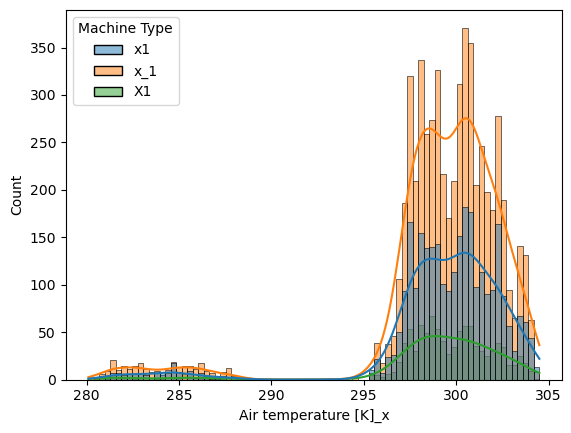

In [99]:
# Checking to see this worked

sns.histplot(x=df2['Air temperature [K]_x'], hue = df['Machine Type'], kde = True)
plt.show()

In [100]:
df2 = df2.drop(columns = ['Air temperature [K]_y'])
df2 = df2.rename(columns = {'Air temperature [K]_x':'Air temperature [K]'})

<Axes: xlabel='Process temperature [K]', ylabel='Count'>

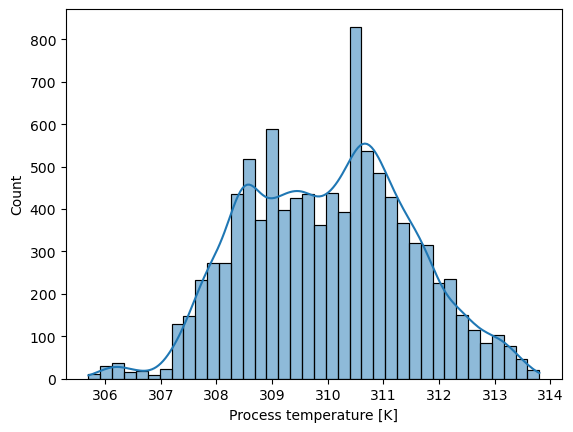

In [102]:
# Checking process temperature column 
# Pretty normally distributed and no outliers

sns.histplot(df2['Process temperature [K]'], kde = True)



<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

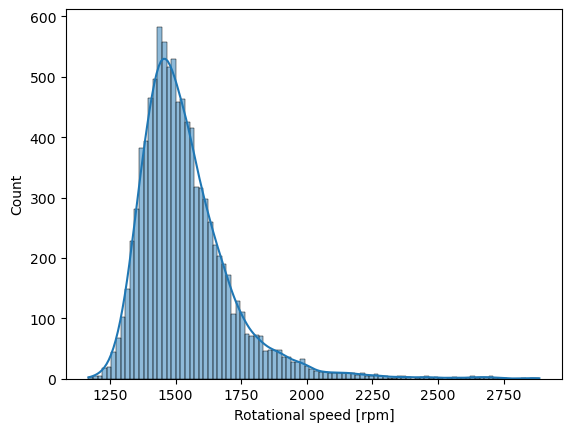

In [103]:
# Rotational Speed column 
# ALso need to fix na values we observed earlier
# Couple of extreme values here - right skewed - needs explored further

sns.histplot(df2['Rotational speed [rpm]'], kde = True)



In [104]:
# We have alot of power failures at these high rpm's therefore going to leave as they are 
#Early suggestion that rotational speed could be a strong predictor of power failure
df2.loc[df2['Rotational speed [rpm]'] > 2250]



,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp,Date,Time
50,L47230,x_1,298.9,309.1,2861.0,4.6,143,1,Power Failure,03/12/2001 02:00,2001-03-12,2026-01-04 02:00:00
192,M15054,x1,298.2,308.5,2678.0,10.7,86,1,Power Failure,09/12/2001 02:00,2001-09-12,2026-01-04 02:00:00
340,M15204,x1,297.5,308.2,2448.0,13.8,29,0,No Failure,15/12/2001 08:00,2001-12-15,2026-01-04 08:00:00
376,L47560,x_1,297.5,308.3,2564.0,12.8,127,1,Power Failure,16/12/2001 20:00,2001-12-16,2026-01-04 20:00:00
458,L47643,x_1,297.4,308.7,2874.0,4.2,118,1,Power Failure,20/12/2001 07:00,2001-12-20,2026-01-04 07:00:00
839,L48027,x_1,296.4,307.4,2833.0,5.6,213,1,Power Failure,05/01/2002 07:00,2002-05-01,2026-01-04 07:00:00
894,L48083,x_1,295.7,306.2,2270.0,14.6,149,1,Power Failure,07/01/2002 15:00,2002-07-01,2026-01-04 15:00:00
1081,L48275,x_1,296.9,307.5,2721.0,9.3,18,1,Power Failure,15/01/2002 15:00,2002-01-15,2026-01-04 15:00:00
1194,H30623,X1,297.0,308.1,2540.0,13.3,98,0,No Failure,20/01/2002 09:00,2002-01-20,2026-01-04 09:00:00
1219,H30648,X1,297.2,308.5,2440.0,14.0,166,0,No Failure,21/01/2002 10:00,2002-01-21,2026-01-04 10:00:00


In [105]:
##Fixing na in rotational speed
## Not losing failure data so fine to just remove

df2.isnull().sum()

df2.loc[df2['Rotational speed [rpm]'].isnull()].head(100)

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp,Date,Time
26,L47206,x_1,299.1,309.5,NaN,39.0,75,0,No Failure,02/12/2001 02:00,2001-02-12,2026-01-04 02:00:00
184,L47366,x_1,298.1,308.3,NaN,56.0,63,0,No Failure,08/12/2001 18:00,2001-08-12,2026-01-04 18:00:00
307,H29724,X1,298.0,308.6,NaN,41.8,160,0,No Failure,13/12/2001 22:00,2001-12-13,2026-01-04 22:00:00
418,L47602,x_1,297.3,308.3,NaN,55.2,11,0,No Failure,18/12/2001 14:00,2001-12-18,2026-01-04 14:00:00
577,H29997,X1,297.7,309.6,NaN,32.2,210,0,No Failure,25/12/2001 07:00,2001-12-25,2026-01-04 07:00:00
780,M15648,x1,296.9,308.1,NaN,46.3,64,0,No Failure,02/01/2002 20:00,2002-02-01,2026-01-04 20:00:00
782,L47970,x_1,296.8,307.9,NaN,45.4,70,0,No Failure,02/01/2002 22:00,2002-02-01,2026-01-04 22:00:00
830,H30252,X1,296.6,307.4,NaN,41.5,189,0,No Failure,04/01/2002 22:00,2002-04-01,2026-01-04 22:00:00
850,M15718,x1,296.2,307.0,NaN,37.6,25,0,No Failure,05/01/2002 18:00,2002-05-01,2026-01-04 18:00:00
1034,L48228,x_1,296.5,307.6,NaN,33.5,104,0,No Failure,13/01/2002 16:00,2002-01-13,2026-01-04 16:00:00


In [106]:
df2 = df2.loc[df2['Rotational speed [rpm]'].notna()]


<Axes: xlabel='Tool wear [min]', ylabel='Count'>

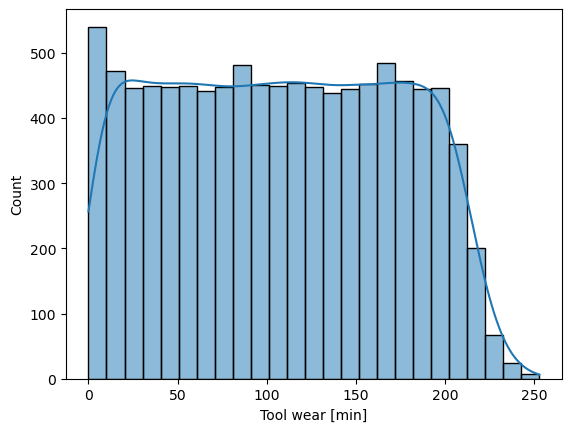

In [ ]:
# Tool wear column 
#pretty uniform distribution
sns.histplot(df2['Tool wear [min]'], kde = True)

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

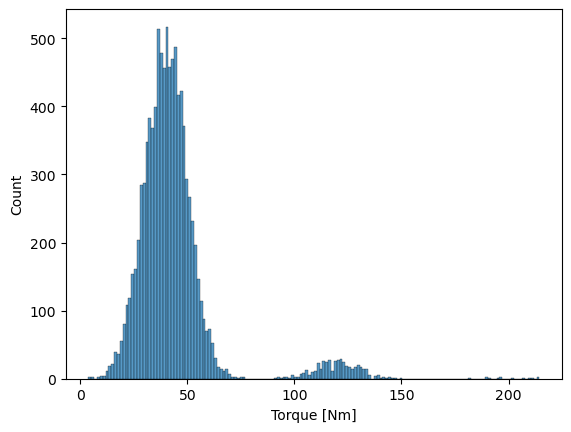

In [108]:
# Torque column 
# Similar plot to air temperature with a normal distribution then a seperate normal distribution 
# Quite a few high observations needing explored further
sns.histplot(df2['Torque [Nm]'])



In [109]:
# Going to leave this column as it is for now as dont have enough of an understanding of tool wear to detrmine if these values are outliers
df2.loc[df2['Torque [Nm]'] > 75]

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Timestamp,Date,Time
9,M14869,x1,298.5,309.0,1741.0,107.8,21,0,No Failure,01/12/2001 09:00,2001-01-12,2026-01-04 09:00:00
17,M14877,x1,298.7,309.2,1410.0,125.4,47,0,No Failure,01/12/2001 17:00,2001-01-12,2026-01-04 17:00:00
23,L47203,x_1,299.0,309.4,1758.0,105.5,68,0,No Failure,01/12/2001 23:00,2001-01-12,2026-01-04 23:00:00
30,M14890,x1,299.1,309.5,1339.0,128.0,86,0,No Failure,02/12/2001 06:00,2001-02-12,2026-01-04 06:00:00
31,L47211,x_1,299.0,309.4,1798.0,105.3,89,0,No Failure,02/12/2001 07:00,2001-02-12,2026-01-04 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
9835,L57115,x_1,298.4,308.3,1452.0,128.3,73,0,No Failure,18/01/2003 23:00,2003-01-18,2026-01-04 23:00:00
9838,L57118,x_1,298.3,308.1,1528.0,113.7,82,0,No Failure,19/01/2003 02:00,2003-01-19,2026-01-04 02:00:00
9845,L57125,x_1,298.3,308.0,1578.0,117.6,101,0,No Failure,19/01/2003 09:00,2003-01-19,2026-01-04 09:00:00
9866,L57146,x_1,298.3,307.9,1507.0,121.0,149,0,No Failure,20/01/2003 06:00,2003-01-20,2026-01-04 06:00:00


In [110]:
# Target column 
# There is no failures in this also so do not see the point of target - will make a seperate failure variable


df2.loc[df2['Target'] == 1]

df2 = df2.drop(columns = ['Target'])


In [111]:
# Creating dummy failure variable in place of innacurate target variable
df2['Failure'] = 1
df2.loc[df2['Failure Type'] == 'No Failure', 'Failure'] = 0

In [112]:
df2['Failure Type'].value_counts()

Failure Type
No Failure                  9455
Heat Dissipation Failure     112
Power Failure                 94
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               17
Name: count, dtype: int64

In [ ]:
# Checking for duplicates by groupingon unique columns 
df2[['Date', 'Time', 'Machine Type']] \
.groupby(by = ['Date', 'Time']).count().loc[lambda x: x['Machine Type'] > 1]

In [ ]:
# Dataset reading for exploratory data analysis and machine learning

df2.head()

,UID,Machine Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Timestamp,Date,Time,Failure
0,M14860,x1,298.1,308.6,1551.0,42.8,0,No Failure,01/12/2001 00:00,2001-01-12,2026-01-04 00:00:00,0
1,L47181,x_1,298.2,308.7,1408.0,46.3,3,No Failure,01/12/2001 01:00,2001-01-12,2026-01-04 01:00:00,0
2,L47182,x_1,298.1,308.5,1498.0,49.4,5,No Failure,01/12/2001 02:00,2001-01-12,2026-01-04 02:00:00,0
3,L47183,x_1,298.2,308.6,1433.0,39.5,7,No Failure,01/12/2001 03:00,2001-01-12,2026-01-04 03:00:00,0
4,L47184,x_1,298.2,308.7,1408.0,40.0,9,No Failure,01/12/2001 04:00,2001-01-12,2026-01-04 04:00:00,0
